<a href="https://colab.research.google.com/github/MJSarvajith/Data-Science-Python/blob/main/Ai_and_Applications2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

The study examines the Education Insights dataset which holds one million student records that document study time and attendance details and classroom participation and exam results and total grades. The study examines the impact of student participation on learning strategies which leads to enhanced academic success. The project team will analyze the collected data to determine which factors create the most influence on student academic performance and achievement. The research findings will direct educators and students toward effective strategies which produce superior educational outcomes and academic achievements.

**Imported Libraries**

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('Education_Insights.csv')

**Preview of Dataset**

In [184]:
df.shape

(1000000, 6)

In [185]:
df.head(10)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
5,6,13.4,65.1,5.0,97.5,A
6,7,26.1,81.8,5.9,100.0,A
7,8,20.4,100.0,4.0,96.1,A
8,9,11.7,100.0,8.2,69.8,C
9,10,18.8,67.6,6.0,80.3,B


**Dataset Information**

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


**Missing Value Analysis**

In [187]:
missing_values = df.isnull().sum()
print(missing_values)

student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64


**Dataset Description**

In [188]:
df.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


**Data Analysis**

1. How do the average study hours and the average scores change across different grades?

       weekly_self_study_hours  total_score
grade                                      
A                    19.375738    96.042375
B                    12.115533    77.946590
C                     7.691161    63.564524
D                     3.764143    49.380346
F                     1.524662    35.474146


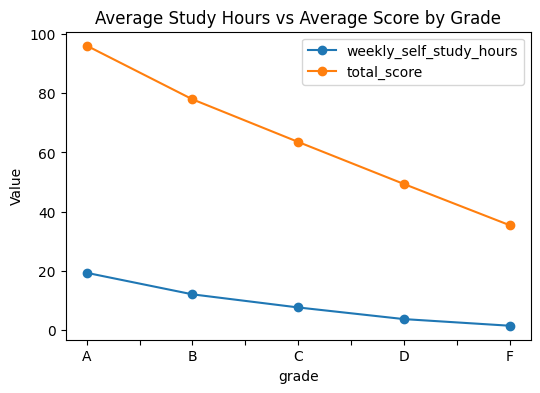

In [189]:
study_vs_score = df.groupby('grade')[['weekly_self_study_hours','total_score']].mean()
print(study_vs_score)
study_vs_score.plot(kind='line', marker='o', figsize=(6,4))
plt.title("Average Study Hours vs Average Score by Grade")
plt.ylabel("Value")
plt.show()

2. How many students scored between 70 and 80?

In [190]:
score_70_80 = df[(df['total_score'] >= 70) & (df['total_score'] <= 80)]
print(f"Answer: Number of students who scored between 70 and 80: {score_70_80.shape[0]}")

Answer: Number of students who scored between 70 and 80: 164272


3. Which grade group has the highest average total score?

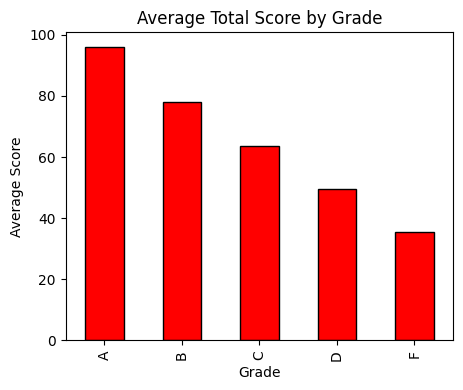

In [191]:
avg_scores = df.groupby('grade')['total_score'].mean()
avg_scores.plot(kind='bar', color='red', edgecolor='black', figsize=(5,4))
plt.title("Average Total Score by Grade")
plt.ylabel("Average Score")
plt.xlabel("Grade")
plt.show()

4. What is the average attendance percentage of all students?

Answer: 84.71 %


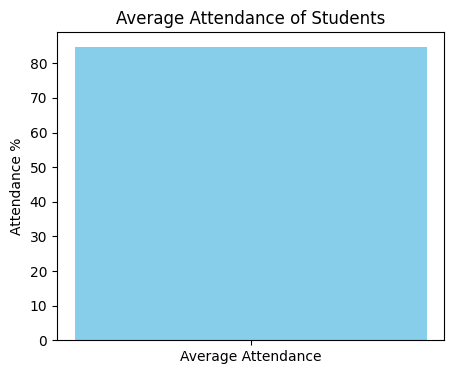

In [192]:
avg_attendance = df['attendance_percentage'].mean()
print("Answer:", round(avg_attendance, 2), "%")
plt.figure(figsize=(5,4))
plt.bar(["Average Attendance"], [avg_attendance], color="skyblue")
plt.ylabel("Attendance %")
plt.title("Average Attendance of Students")
plt.show()


5. How many students scored a perfect 100?

In [193]:
perfect_scores = df[df['total_score'] == 100]
print(f"Answer: Number of students who scored 100 marks:  {perfect_scores.shape[0]}")


Answer: Number of students who scored 100 marks:  268121


6. Percentage of students has achieved graded in A

In [194]:
grade_counts = df['grade'].value_counts(normalize=True) * 100
print(grade_counts)

print(f"Answer: {grade_counts['A']:.2f}% of students achieved a grade A.")


grade
A    54.8644
B    25.8174
C    14.1980
D     4.4998
F     0.6204
Name: proportion, dtype: float64
Answer: 54.86% of students achieved a grade A.


7. Which grade has the highest average attendance?

In [195]:
avg_attendance_by_grade = df.groupby('grade')['attendance_percentage'].mean()
print(avg_attendance_by_grade)
top_grade = avg_attendance_by_grade.idxmax()
top_value = avg_attendance_by_grade.max()
print(f"Grade with highest average attendance: {top_grade} ({top_value:.2f}%)")

grade
A    84.710114
B    84.696178
C    84.726340
D    84.723243
F    84.973662
Name: attendance_percentage, dtype: float64
Grade with highest average attendance: F (84.97%)


8. How many students had less than 50% attendance?

In [196]:
low_attendance = df[df['attendance_percentage'] < 50]
print(f"Number of students who got less than 50% attendance: {low_attendance.shape[0]}")

Number of students who got less than 50% attendance: 0


9. Which grade group studies the most hours per week on average?

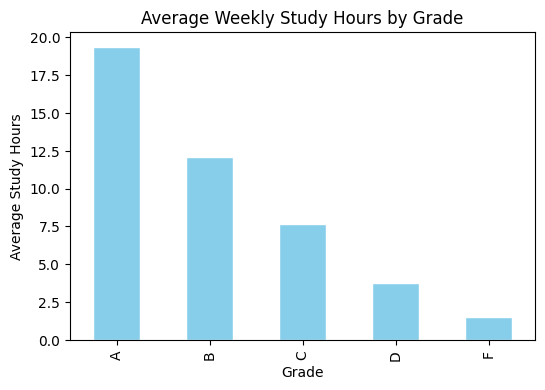

In [197]:

avg_study = df.groupby('grade')['weekly_self_study_hours'].mean()
avg_study.plot(kind='bar', color='skyblue', edgecolor='white', figsize=(6,4))
plt.title("Average Weekly Study Hours by Grade")
plt.ylabel("Average Study Hours")
plt.xlabel("Grade")
plt.show()

10. How many students have both attendance above 80% and a score above 90?

In [198]:
high_perf_students = df[(df['attendance_percentage'] > 80) & (df['total_score'] > 90)].shape[0]
print("Answer: Number of students with attendance >80% and score >90 =", high_perf_students)

Answer: Number of students with attendance >80% and score >90 = 309946


**About Dataset**

The dataset containing 1 million records of students, including study hours, attendance, participation, scores, and grades, will analyze how study habits and behavior in the classroom are related to academic performance.

**Key Insights**
1. The dataset contains one million students with complete records (no missing values).

2. On the average, self-study is hardly more than 15 hours a week.

3. All students have an attendance rate of 84.7%.

4. Grade A is the most common grade, followed by B and C.

5. More than 260,000 students scored 100.

6. On average, students studying more than 20 hours a week score much better, ~98.6, than those studying less, ~79.9.

7. Students with a class attendance ranging between 90-100% tend to score the highest in average.

8. Most students are somewhat active, as indicated by an average class participation score of 6.

9. The most striking thing is that students in Grade F continue to score the lowest while also maintaining an unusually high average attendance (~85%).

10. While attendance agree with performance, study hours are more important.

**Conclusion**

Data from the Education Insights study implies that study time, attendance, and classroom participation are all good predictors of student outcomes. Students who study more outside of class, in combination with consistent attendance and higher engagement in the classroom contexts, earn higher scores and grades. Moreover, student engagement has a demonstrable benefit to classroom outcomes. Overall, the data provides an unambiguous signal; balanced student academic habits are supportive of academic success.

**Link to Video on Google Drive**


https://drive.google.com/file/d/1nAGjzAo4vItA3kOF74oq7db1cqC849IY/view?usp=sharing

**Github Link**

https://github.com/MJSarvajith/Data-Science-Python/blob/main/Ai_and_Applications.ipynb

**Dataset Link**

https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset